<a href="http://www.unioeste.br"><img src="https://www5.unioeste.br/portalunioeste/templates/tlpcampus/images/logoUnioeste.png" align="right"></a>

<h1><center>Atividade Prática em R - Representações Gráficas</center></h1>

<center>Prof.Dr. Plinio Andrade</center>

Nesta atividade prática você aprenderá a utilizar o R para obter:

* diagramas de setores;
* gráficos de barras;
* histogramas;
* gráficos de série temporal.

<b> <font color='red'>ATENÇÃO!</font></b> sempre que este arquivo for reaberto você deverá executar todas as células de código novamente. Cada célula ativa é executada pressionando o botão <b>Run</b> no menu ou teclando <b>Ctrl+Enter</b>.

Caso necessite criar mais células de código, basta ir ao menu Insert.

***

## 1) Sobre os dados

Novamente, utilizaremos nesta prática os dados de Bussab & Morettin (2006). Vamos armazená-los na memória executando a célula a seguir:

In [ ]:
arquivo = url('https://www.ime.usp.br/~pam/dados.RData') # armazenamos o endereço eletrônico numa variável chamada arquivo
load(arquivo)                                            # carregando o arquivo
attach(tab2_1)                                           # acessando as variáveis

## 2) Representações Gráficas
Vamos conhecer agora algumas funções para represendar dados graficamente. Utilizaremos os mesmos exemplos apresentados em aula.

### 2.1) Diagrama de setores (pizza)
Para esse tipo de gráfico, devemos coletar as frequências (absolutas, relativas, ou porcentagens) da variável de interesse e utilizar a função ```pie()```. Vamos considerar a variável **grau de instrução**. Execute a célula a seguir:

In [ ]:
ni = table(grau_instrucao) # armazenando as frequências absolutas da variável grau de instrução num objeto "ni"
pie(ni)                    # obtendo o gráfico 

In [ ]:
pie(table(grau_instrucao)) # comando alternativo (mais direto)

Segue uma versão com alguma formatação:

In [ ]:
pie(ni, col = c("red","blue","green"), labels = c("fundamental", "médio", "superior"), main = "Gráfico de setores para grau de instrução")

### Exercício 1
Obtenha um gráfico de pizza simples ou detalhado para a variável **região de procedência**.

### 2.2) Gráfico de Barras
Para construir um gráfico de barras no R devemos utilizar a função ```barplot()```. O argumento da função receberá novamente as frequências da variável em estudo. Considere novamente a variável **grau de instrução** (lembre-se que as frequências absolutas já foram armazenadas num objeto "ni" quando o gráfico de pizza foi construído). Execute a célula a seguir:

In [ ]:
barplot(ni)

Este gráfico pode ser disposto na horizontal com o argumento ```horiz = TRUE```. Execute a célula a seguir:

In [ ]:
barplot(ni, horiz = TRUE)

Segue uma versão com alguma formatação:

In [ ]:
barplot(ni, col = c("red","blue","green"), names = c("fundamental", "médio", "superior"), main = "Gráfico de barras de grau de instrução")

Vamos agora construir um gráfico de barras para a variável **salário**. Lembre-se que neste caso devemos construir os intervalos de classe (como vimos no roteiro anterior):

In [ ]:
int = cut(salario, c(4,8,12,16,20,24), right=FALSE) # criando os intervalos de classe
sal = table(int)                                    # criando a distribuição de frequências de cada faixa salarial
barplot(sal)                                        # imprimindo o gráfico de barras

### Exercício 2
Construa um gráfico de barras para as variáveis **número de filhos**. Compare com o apresentado em aula.

### Exemplo (dados que já se encontram como uma tabela de frequências).

Os dados a seguir apresentam o número acumulado de casos confirmados e mortes por COVID-19 nos estados brasileiros (e o distrito federal) até o dia 16/06/2021 (dados obtidos no site Brasil.IO - https://brasil.io/datasets). Os dados também informam a região do país onde cada estado se encontra. Note que a tabela já está num formato de uma tabela de distribuição de frequências (absolutas).

In [ ]:
dados = read.table("covid_estados.csv", header = TRUE, sep = ",")
attach(dados)
dados

Neste caso, a função ```barplot()``` ou a função ```pie()``` retornarão os gráficos corretamente, mas sem especificar os rótulos. Observe a seguir:

In [ ]:
par(mfrow = c(1,2)) # inserindo dois gráficos em uma única janela (1 linha, 2 colunas)
barplot(mortes)
pie(mortes)

O código ```names(obj1) = obj2``` pega cada valor do argumento ```obj1``` e atribui um nome correspondente armazenado no objeto ```obj2```. Para os dados do exemplo, podemos rotular cada frequência (casos confirmados ou mortes) pelo seu estado correspondente. Execute as células a seguir: 

In [ ]:
names(mortes)      = estados
names(confirmados) = estados

In [ ]:
mortes # visualizando os dados de mortes agora rotulados.

Note agora que o gráfico de barras estará devidamente rotulado (uma visualização melhor pode ser obtida diretamente no software R ou RStudio).

In [ ]:
barplot(mortes)

Faça o mesmo para o número de casos confirmados, bem como seus respectivos gráficos de setores. Pelo fato de termos 26 estados e o distrito federal, a visualização por meio de um gráfico de setores não é muito agradável. Uma alternativa pode ser visualizar o número de mortes (ou casos confirmados) para cada região do Brasil. Por exemplo:

In [ ]:
regiao # visualizando o vetor de dados da variável região

In [ ]:
regiao == "Sul" # teste lógico para verificar quais valores da variável região é igual a "Sul"

In [ ]:
mortes[regiao == "Sul"] # apresenta o número de mortos da região Sul

In [ ]:
pie(mortes[regiao == "Sul"]) # diagrama de setores correspondente

In [ ]:
# Versão mais detalhada
msul      = mortes[regiao == "Sul"]        # mortes da região "Sul"
msul_porc = round((msul/sum(msul))*100,2)  # porcentagens com 1 casa decimal

# plotando o gráfico
pie(msul_porc, labels = paste(names(msul)," (", as.character(msul_porc),"%)", sep = ""),
    main = "Versão detalhada (formatada)",
    col = c("red","blue","green"))

In [ ]:
barplot(mortes[regiao == "Sul"])

In [ ]:
# Versão mais detalhada, aproveitando o vetor de dados msul_porc criado anteriormente
barplot(msul_porc, main = "Versão detalhada (formatada)",
        ylab = "Frequência relativa em %",
        xlab = "Estados da região sul",
        col = c("red","blue","green"))

Outra possível visualização consiste em contar o acumulado de mortes (ou casos confirmados) por região. A função ```sum()``` serve para somar os elementos de um vetor de dados. Por exemplo:

In [ ]:
sum(mortes[regiao == "Sul"]) # soma o número de mortes na região Sul

Procedendo de maneira análoga para as demais regiões, podemos obter a seguinte tabela de distribuição de frequências:

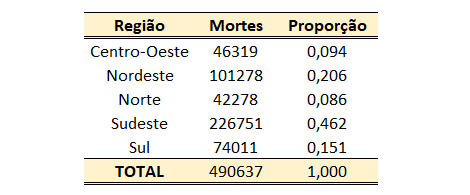

Você consegue facilmente fazer um gráfico de barras ou de setores utilizando a tabela acima, seja manualmente ou por meio do Excel. Segue um código em R (que não utiliza recursos muito avançados):

In [ ]:
# Somando as mortes por região
soma_CO = sum(mortes[regiao == "Centro-Oeste"])
soma_NE = sum(mortes[regiao == "Nordeste"])
soma_N  = sum(mortes[regiao == "Norte"]) 
soma_SE = sum(mortes[regiao == "Sudeste"]) 
soma_S  = sum(mortes[regiao == "Sul"])

# Criando os dados de mortes por região
mortes_reg = c(soma_CO, soma_NE, soma_N, soma_SE, soma_S)

# Rotulando
names(mortes_reg) = levels(regiao)

# Visualizando
mortes_reg

In [ ]:
pie(mortes_reg)

In [ ]:
barplot(mortes_reg)

### 2.3) Histogramas
A construção de histogramas é muito simples e direta no R. A escolha dos intervalos de classe é automática (o padrão utiliza a regra de Sturges vista em aula), embora seja possível escolher arbitrariamente se necessário. Vamos construir um histograma para a variável **salário** considerando suas versões em frequência absoluta e relativa. Vamos também construir uma versão com os mesmos intervalos de classe que foram escolhidos na aula.

### (i) Histograma com densidade de frequência absoluta (padrão)
Um histograma é construído por meio da função ```hist()```. Em sua forma mais simples, basta informar o rótulo da variável quantitativa desejada. Execute a célula a seguir:

In [ ]:
hist(salario)

### (ii) Histograma com densidade de frequência relativa

Neste caso, devemos informar também o argumento ```freq = FALSE```. Execute a célula a seguir e observe o que acontecerá com o eixo vertical (y):

In [ ]:
hist(salario, freq = FALSE)

### (iii) Histograma com intervalos de classe arbitrários

Neste caso devemos informar o argumento ```breaks```, seja para obter um histograma com densidade de frequência absoluta ou relativa.  Os extremos de cada intervalo de classe devem ser especificados. Execute a célula a seguir para obter o mesmo histograma apresentado em aula para variável **salário** (para não complicar demais, os eixos não estão com a mesma formatação dos slides e nenhuma cor foi aplicada, mas trata-se do mesmo histograma):

In [ ]:
hist(salario, freq = FALSE, breaks = c(4,8,12,16,20,24))

### Exercício 3
Obtenha um histograma para a variável **número de filhos**.

### 2.4) Gráfico de série temporal
A função ```plot()``` pode ser utilizada para fazer diversos gráficos, dentre eles, o gráfico de série temporal. No entanto, é mais comum utilizar a função ```plot.ts()``` por ser mais simples (converte automaticamente o vetor de dados em uma série temporal). Vamos obter o gráfico de série temporal para os dados de concentrações de $CO_2$ visto em aula (esse conjunto de dados já vem carregado em qualquer versão instalada do R):

In [ ]:
co2 # visualizando os dados (ignore possíveis avisos de erro)

In [ ]:
plot.ts(co2)

In [ ]:
# versão com alguma formatação
plot.ts(co2, xlab = "Tempo (anos)", ylab = "concentração (ppm)", main = "Concentrações de CO2 em Mauna Loa")

### Exemplo (Evolução da COVID-19 no Brasil e outros países).

Os dados a seguir apresentam a evolução dos casos confirmados e mortes por COVID-19 em todo o mundo. Os dados podem ser manipulados e visualizados em tempo real em https://data.humdata.org/dataset/coronavirus-covid-19-cases-and-deaths. Faremos a leitura dos dados diretamente do site. Execute a célula a seguir:

In [ ]:
path       = url('https://covid19.who.int/WHO-COVID-19-global-data.csv') # armazenamos o endereço eletrônico numa variável chamada path
dados_full = read.csv(path, header = TRUE, sep = ",")                    # carregando o arquivo 
attach(dados_full)                                                       # acessando as variáveis
dados_full                                                               # visualizando

In [ ]:
levels(Country) # visualizando os nomes dos países

In [ ]:
# armazenando as mortes acumuladas por país
mortes_bra = Cumulative_deaths[Country == "Brazil"]
mortes_eua = Cumulative_deaths[Country == "United States of America"]
mortes_ind = Cumulative_deaths[Country == "India"]

In [ ]:
plot.ts(mortes_bra) # gráfico sem formatação para o acumulado de mortes no Brasil

A função ```lines()``` adiciona um gráfico de linhas semelhante ao gráfico de série temporal à um gráfico previamente criado. Isso viabiliza a comparação de duas ou mais séries de temporais. Observe como isso pode ser feito na célula a seguir:

In [ ]:
plot.ts(mortes_eua/1000, col = "blue", xlab = "tempo (de 03/01/2020 até a última atualização)", ylab = "mortes (em milhares)")
lines(mortes_bra/1000, col = "green")
lines(mortes_ind/1000, col = "yellow")

### Exercício 4
Obtenha um gráfico de série temporal para os novos casos (**new_cases**) de COVID-19 no Brasil. A formatação é opcional.

## Até a próxima!